In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving daily-total-female-births-CA.csv to daily-total-female-births-CA.csv


In [ ]:
import io
birth = pd.read_csv(io.BytesIO(uploaded['daily-total-female-births-CA.csv']), index_col=[0], parse_dates=[0])
# squeeze = True changes into a Pandas series
# parse_dates = [1] parses the dates
# index_col = [1] defines which column is the Index

In [ ]:
birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
type(birth)
# need DataFrame for Time Series Analysis

pandas.core.frame.DataFrame

In [ ]:
series_value = birth.values
series_value
type(series_value) #transforms into numpy.ndarray

numpy.ndarray

In [ ]:
birth.size

365

In [ ]:
birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [ ]:
#remove the last value if it isn't necessary
birth = birth[0:365]

In [ ]:
birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [ ]:
birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


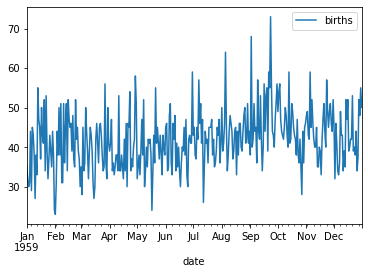

In [ ]:
#visualise the data
birth.plot()

Smoothing out with Movering Averages (MA)

In [ ]:
birth_mean = birth.rolling(window = 20).mean() # what moving average value in the paramter (window = x) of .rolling()
#useful for stocks to smooth the series

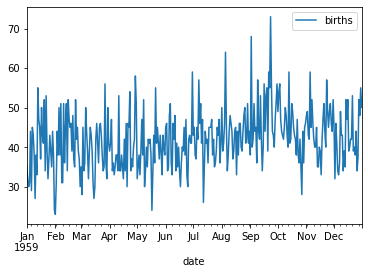

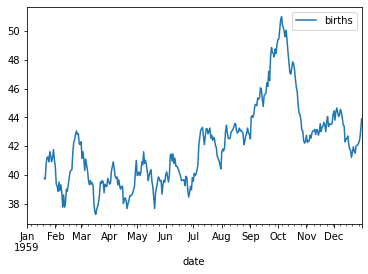

In [ ]:
birth.plot()
birth_mean.plot()

In [ ]:
birth_value = birth.values #transform DF into Series
value = pd.DataFrame(birth_value)
birth_df = pd.concat([value, value.shift(1)], axis=1) #combine 2 Series into one dataframe using pd.concat()

In [ ]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [ ]:
birth_df.columns = ['Actual_Birth', 'Forecast_Birth']
birth_df.head()

,Actual_Birth,Forecast_Birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
#remove NaN value
birth_test = birth_df[0:]

In [ ]:
birth_test.head()

,Actual_Birth,Forecast_Birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [ ]:
birth_test.tail()

,Actual_Birth,Forecast_Birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [ ]:
birth_error = mean_squared_error(birth_test.Actual_Birth, birth_test.Forecast_Birth)
birth_error #the outliers were not present (mean at bottom of DataFrame of 1930)

84.22252747252747

In [ ]:
np.sqrt(birth_error)

9.177283229394606

ARIMA - Autoregressive Integrated Moving Average

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

# ARIMA(p,d,q)

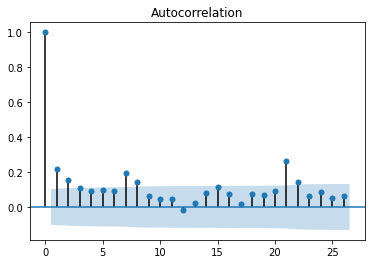

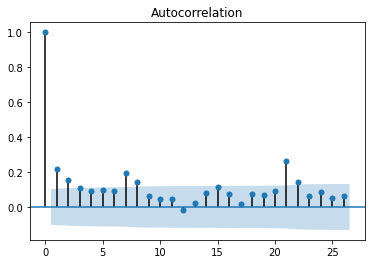

In [ ]:
plot_acf(birth) #plot_acf is to identify parameter q

#shaded in blue is the critical limit

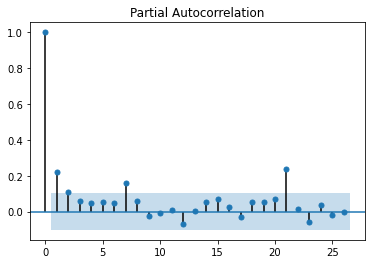

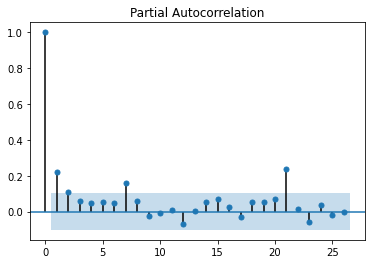

In [ ]:
plot_pacf(birth) #to identify value of p

In [ ]:
# p = 2, 3 ... q = 3, 4 ... d = 0
birth_train = birth[0:330]
birth_test = birth[330:365]

In [ ]:
birth_train.size
birth_test.size

35

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
birth_model = ARIMA(birth_train, order=(2,1,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
birth_model_fit = birth_model.fit()

In [ ]:
birth_model_fit.aic

# .aic is "archaic information criteria"
# value indicates 
# smaller is better

2230.9482523572665

In [ ]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]


In [ ]:
birth_forecast

array([45.30369833, 46.3106401 , 43.64945872, 44.59219668, 46.49706372,
       44.34348086, 44.08984412, 46.34390382, 45.07535206, 43.88105961,
       45.9521466 , 45.69576995, 43.97398079, 45.45674188, 46.10377395,
       44.31134533, 44.99233795, 46.26018937, 44.79345871, 44.66474437,
       46.18573149, 45.30637415, 44.5332346 , 45.94670787, 45.74844039,
       44.60565402, 45.63340441, 46.04985077, 44.84525522, 45.33695327,
       46.18219996, 45.1858708 , 45.12984484, 46.15767119, 45.55082443])

In [ ]:
birth

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(birth_test, birth_forecast)) # error of 6.85

6.859975697276732

How to improve? change the parameters in order=()... ARIMA(birth_train, order=(2,1,3)) and keep experimenting